# DATASCI - Data Project 
### Which factors have a drastic effect in determining the best-selling game on Steam?
#### Group Members:
Ampong, Dustin <br>
Landrito, Miguel <br>
Lee, Joseph <br>
Quiachon, Janren <br>



---



This project is done through the Steam Kaggle Dataset that can be found in the link below: <br>
https://www.kaggle.com/nikdavis/steam-store-games

27,000 games
Game title, genre, platforms, #of owners, release date, publishers

The research questions we hope to address are the following: <br>
What are the best selling genres/categories (Battle Royale, Shooter, MMORPG, MOBA)? <br>
What are the highest selling games annually? <br>
What are the highest selling games overall? <br>
Which games are made by popular publishers? <br>
What are the trends (Change in Peoples' Preferences)? <br>
What are the most preferred categories (Multiplayer, Singleplayer)? <br>

## Importing Libraries

In [31]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## added
from collections import Counter


## Reading the CSV file
The list below is sorted by number of owners in descending order.

In [32]:
df_steam = pd.read_csv('steam.csv')
df_steam.sort_values(by='owners', ascending=False)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
25,730,Counter-Strike: Global Offensive,2012-08-21,1,Valve;Hidden Path Entertainment,Valve,windows;mac;linux,0,Multi-player;Steam Achievements;Full controlle...,Action;Free to Play,FPS;Multiplayer;Shooter,167,2644404,402313,22494,6502,50000000-100000000,0.00
12836,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,1,PUBG Corporation,PUBG Corporation,windows,0,Multi-player;Online Multi-Player;Stats,Action;Adventure;Massively Multiplayer,Survival;Shooter;Multiplayer,37,496184,487076,22938,12434,50000000-100000000,26.99
258,10180,Call of Duty®: Modern Warfare® 2,2009-11-11,1,Infinity Ward;Aspyr (Mac),Activision;Aspyr (Mac),windows;mac,0,Single-player;Multi-player;Co-op;Steam Achieve...,Action,Action;FPS;Multiplayer,50,30006,2826,999,580,5000000-10000000,19.99
2602,278360,A Story About My Uncle,2014-05-28,1,Gone North Games,Coffee Stain Publishing,windows;mac;linux,0,Single-player;Steam Achievements;Full controll...,Adventure;Casual;Indie,Adventure;First-Person;Parkour,15,17924,1642,193,220,5000000-10000000,9.99
903,49520,Borderlands 2,2012-09-20,1,Gearbox Software;Aspyr (Mac);Aspyr (Linux),2K;Aspyr (Mac);Aspyr (Linux),windows;mac;linux,18,Single-player;Co-op;Steam Achievements;Full co...,Action;RPG,FPS;Co-op;RPG,69,144595,11021,3276,1139,5000000-10000000,19.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13455,596640,Lost in the Ocean VR,2017-02-24,1,Tunnel Vision Studio,Tunnel Vision Studio,windows,0,Single-player,Action;Adventure;Indie;Simulation,Action;Indie;Simulation,0,15,13,0,0,0-20000,5.59
13454,596630,Ricochet Kills: Noir,2017-03-03,1,mibix,mibix,windows,0,Single-player;Steam Achievements;Includes leve...,Indie,Indie;Puzzle;2D,6,33,4,0,0,0-20000,2.09
13453,596620,Gas Guzzlers: Combat Carnage,2017-03-09,1,Gamepires,Gamepires,windows,0,Single-player;Multi-player;Online Multi-Player...,Action;Racing,Action;Racing;Shooter,0,38,4,0,0,0-20000,3.99
13451,596540,The Lost Heir 3: Demon War,2017-03-17,1,Hosted Games,Hosted Games,windows;mac;linux,0,Single-player;Steam Achievements;Captions avai...,Adventure;Indie;RPG,Indie;RPG;Adventure,52,13,14,0,0,0-20000,4.79


** The columns/attributes in the csv file showing the amount of null values **

In [33]:
df_steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

#### Since the dataset has already been cleaned, we are just verifying to see if there are still present null values that can be cleaned.

In [34]:
# Checking all the Null Values in the Dataset

df_steam.isna().sum()

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

## Checking DataTypes


In [35]:
df_steam.dtypes

appid                 int64
name                 object
release_date         object
english               int64
developer            object
publisher            object
platforms            object
required_age          int64
categories           object
genres               object
steamspy_tags        object
achievements          int64
positive_ratings      int64
negative_ratings      int64
average_playtime      int64
median_playtime       int64
owners               object
price               float64
dtype: object

## Changing Owners to min and max and to Integer DataType

In [36]:
df_steam[['min_owners', 'max_owners']] = df_steam['owners'].str.split('-', 1, expand=True)
df_steam[['min_owners', 'max_owners']] = df_steam[['min_owners', 'max_owners']].astype('int')
##df_steam.min_owners.to_numeric
df_steam.dtypes


appid                 int64
name                 object
release_date         object
english               int64
developer            object
publisher            object
platforms            object
required_age          int64
categories           object
genres               object
steamspy_tags        object
achievements          int64
positive_ratings      int64
negative_ratings      int64
average_playtime      int64
median_playtime       int64
owners               object
price               float64
min_owners            int32
max_owners            int32
dtype: object

In [37]:

#dont mind
df_steamtest= df_steam.copy()
df_steamtest[['windows', 'mac', 'linux']] = df_steamtest.platforms.str.split(';', expand=True)
df_steamtest[['windows', 'mac', 'linux']] = df_steamtest[['windows', 'mac', 'linux']].astype('bool')
df_steamtest[['windows', 'mac', 'linux']] = df_steamtest[['windows', 'mac', 'linux']].astype('int')
df_steamtest
df_steam.head(20)                                 
df_steam

#df_steam.loc[df_steam['name'] == "Dota 2"]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,min_owners,max_owners
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,10000000,20000000
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,5000000,10000000
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,5000000,10000000
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,5000000,10000000
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,5000000,10000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09,0,20000
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69,0,20000
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99,0,20000
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19,0,20000


In [38]:
top_selling = df_steam.loc[df_steam['min_owners'] == 50000000 ] 
top_selling.shape

(2, 20)

#### Adding release_year for the getting only the year

In [39]:
df_steam['release_year'] = pd.DatetimeIndex(df_steam['release_date']).year

game_year= df_steam.groupby(['release_year'], as_index=False)['appid'].count()
game_year = game_year.rename(columns={"release_year": "Year Released", "appid" : "count"}, errors="raise")
game_year= game_year

game_year_10year= game_year.tail(11)

game_year_10year

,Year Released,count
12,2009,305
13,2010,238
14,2011,239
15,2012,320
16,2013,418
17,2014,1555
18,2015,2597
19,2016,4361
20,2017,6357
21,2018,8160


## Number of Games Released Per Year

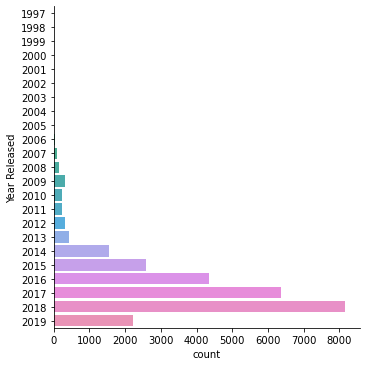

In [40]:
gameyear = sns.catplot(x="count", y="Year Released",orient='h', kind="bar", data=game_year)

** Years 2013 and up have made over 1000 games, whereas 2018 had the most new games at around 8000 newly released titles. **

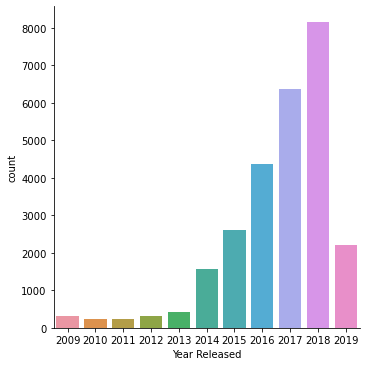

In [41]:
gameyear_decade = sns.catplot(y="count", x="Year Released", kind="bar", data=game_year_10year)

In [42]:
#game_released_most_sale= df_steam.groupby(['release_year', 'name'], as_index=False)['max_owners'].max()
#game_released_most_sale
game_released_most_sale = df_steam.loc[df_steam.groupby("release_year")["max_owners"].idxmax()]
game_released_most_sale= game_released_most_sale.tail(11)
game_released_most_sale

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,min_owners,max_owners,release_year
21,550,Left 4 Dead 2,2009-11-19,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Co-op;Steam Achieve...,Action,...,70,251789,8418,1615,566,10000000-20000000,7.19,10000000,20000000,2009
12,300,Day of Defeat: Source,2010-07-12,1,Valve,Valve,windows;mac;linux,0,Multi-player;Cross-Platform Multiplayer;Steam ...,Action,...,54,10489,1210,1356,134,5000000-10000000,7.19,5000000,10000000,2010
23,620,Portal 2,2011-04-18,1,Valve,Valve,windows;mac;linux,0,Single-player;Co-op;Steam Achievements;Full co...,Action;Adventure,...,51,138220,1891,1102,520,10000000-20000000,7.19,10000000,20000000,2011
25,730,Counter-Strike: Global Offensive,2012-08-21,1,Valve;Hidden Path Entertainment,Valve,windows;mac;linux,0,Multi-player;Steam Achievements;Full controlle...,Action;Free to Play,...,167,2644404,402313,22494,6502,50000000-100000000,0.00,50000000,100000000,2012
22,570,Dota 2,2013-07-09,1,Valve,Valve,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,...,0,863507,142079,23944,801,100000000-200000000,0.00,100000000,200000000,2013
2951,291480,Warface,2014-07-01,1,My.com,My.com,windows,16,Multi-player;Online Multi-Player;MMO;Co-op;Onl...,Action;Free to Play;Massively Multiplayer,...,30,32751,14409,949,104,10000000-20000000,0.00,10000000,20000000,2014
2478,271590,Grand Theft Auto V,2015-04-13,1,Rockstar North,Rockstar Games,windows,18,Single-player;Multi-player;Steam Achievements;...,Action;Adventure,...,77,329061,139308,9837,4834,10000000-20000000,24.99,10000000,20000000,2015
1607,227940,Heroes & Generals,2016-10-18,1,RETO MOTO,RETO MOTO,windows,0,Multi-player;Online Multi-Player;MMO;Online Co...,Action;Free to Play;Indie;Massively Multiplayer,...,0,65856,34416,1752,76,10000000-20000000,0.00,10000000,20000000,2016
12836,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,1,PUBG Corporation,PUBG Corporation,windows,0,Multi-player;Online Multi-Player;Stats,Action;Adventure;Massively Multiplayer,...,37,496184,487076,22938,12434,50000000-100000000,26.99,50000000,100000000,2017
7809,433850,Z1 Battle Royale,2018-02-28,1,NantG,Daybreak Game Company,windows,0,Multi-player;Online Multi-Player;In-App Purchases,Action;Adventure;Free to Play;Massively Multip...,...,0,111434,91664,3142,162,10000000-20000000,0.00,10000000,20000000,2018


In [43]:
Highest_selling_game_per_year_todate = game_released_most_sale[['release_year', 'name', 'max_owners']].copy()
Highest_selling_game_per_year_todate.style

,release_year,name,max_owners
21,2009,Left 4 Dead 2,20000000
12,2010,Day of Defeat: Source,10000000
23,2011,Portal 2,20000000
25,2012,Counter-Strike: Global Offensive,100000000
22,2013,Dota 2,200000000
2951,2014,Warface,20000000
2478,2015,Grand Theft Auto V,20000000
1607,2016,Heroes & Generals,20000000
12836,2017,PLAYERUNKNOWN'S BATTLEGROUNDS,100000000
7809,2018,Z1 Battle Royale,20000000


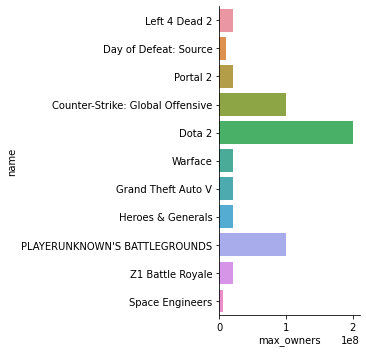

In [44]:
Top_highest_game_per_year = sns.catplot(x="max_owners", y="name" ,orient='h', kind="bar", data=Highest_selling_game_per_year_todate)

These are the top games released for each year which the sales are until to date

## Top 10 Games with Positive and Negative Rating

#### Positive Rating

In [45]:

Top_pos1 = df_steam.sort_values(by='positive_ratings', ascending=False).iloc[:10]
Top_pos = Top_pos1[['appid', 'name', 'positive_ratings']].copy()
Top_pos
#top_games_with_postive_rating = sns.catplot(x="positive_ratings", y="name",orient='h', kind="bar", data=Top_pos)


,appid,name,positive_ratings
25,730,Counter-Strike: Global Offensive,2644404
22,570,Dota 2,863507
19,440,Team Fortress 2,515879
12836,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,496184
121,4000,Garry's Mod,363721
2478,271590,Grand Theft Auto V,329061
1467,218620,PAYDAY 2,308657
3362,304930,Unturned,292574
1120,105600,Terraria,255600
21,550,Left 4 Dead 2,251789


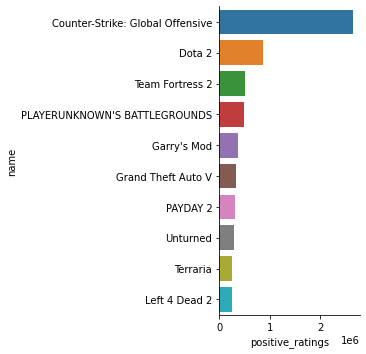

In [46]:
top_games_with_postive_rating = sns.catplot(x="positive_ratings", y="name",orient='h', kind="bar", data=Top_pos)


#### Negative Rating

In [47]:
Top_neg1 = df_steam.sort_values(by='negative_ratings', ascending=False).iloc[:10]
Top_neg = Top_neg1[['appid', 'name', 'negative_ratings']].copy()
Top_neg

,appid,name,negative_ratings
12836,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,487076
25,730,Counter-Strike: Global Offensive,402313
22,570,Dota 2,142079
2478,271590,Grand Theft Auto V,139308
7809,433850,Z1 Battle Royale,91664
1506,221100,DayZ,77169
4712,346110,ARK: Survival Evolved,66603
5235,359550,Tom Clancy's Rainbow Six® Siege,59620
1467,218620,PAYDAY 2,56523
2563,275850,No Man's Sky,56488


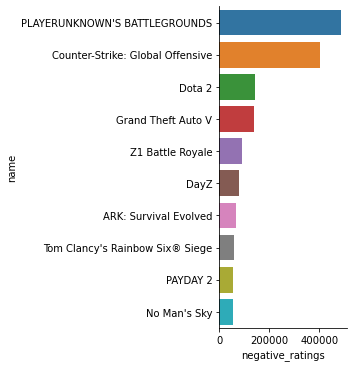

In [48]:
top_games_with_negative_rating = sns.catplot(x="negative_ratings", y="name",orient='h', kind="bar", data=Top_neg)

We can see here that even though we assume that rating would bring profit, there are games that both have many positive and many negative which is also seen later for the highest top games

## Top Games with Highest Average Game Time

In [49]:

Top_time1 = df_steam.sort_values(by='average_playtime', ascending=False).iloc[:10]
Top_time = Top_time1[['appid', 'name', 'average_playtime']].copy()
Top_time
#

,appid,name,average_playtime
9201,474030,The Abbey of Crime Extensum,190625
1478,219340,The Banner Saga: Factions,95245
6014,380140,The Secret of Tremendous Corporation,95242
8969,465520,PRICE,63481
3930,324510,Boundless,55204
3969,326160,Shroud of the Avatar: Forsaken Virtues,54618
2435,269950,X-Plane 11,44169
23409,892420,懒人修仙传,43632
2023,252690,Fantasy Grounds,43074
8919,464350,Screeps,38805


C:\Users\rbmacpc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25042 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rbmacpc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rbmacpc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rbmacpc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20185 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rbmacpc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rbmacpc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 25042 mi

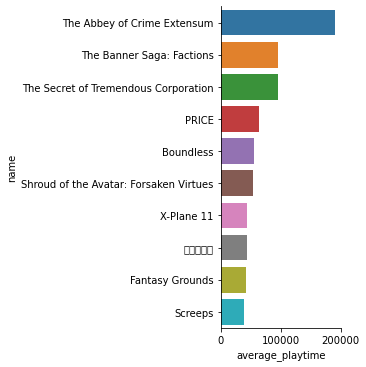

In [50]:
top_games_by_average_playtime = sns.catplot(x="average_playtime", y="name",orient='h', kind="bar", data=Top_time)

The top games with highest avg gameplay is as seen above, however most are unfamilar thus further EDA was done to check top games with over 100,000 sales atleast

### Top Games where Minimum Owners > 100,000

In [51]:
hehe = df_steam[df_steam.min_owners > 100000].sort_values(by='average_playtime', ascending=False).iloc[:10]
hehe

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,min_owners,max_owners,release_year
1478,219340,The Banner Saga: Factions,2013-02-25,1,Stoic,Versus Evil,windows;mac,0,Multi-player;Cross-Platform Multiplayer,Free to Play;Indie;RPG;Strategy,...,42,569,202,95245,190489,200000-500000,0.00,200000,500000,2013
8969,465520,PRICE,2016-09-15,1,YETU GAME,YETU GAME,windows,0,Single-player;Steam Achievements;Steam Trading...,Adventure;Casual;Indie,...,8,4198,233,63481,63490,200000-500000,0.00,200000,500000,2016
744,39210,FINAL FANTASY XIV Online,2014-02-18,1,Square Enix,Square Enix,windows,16,Single-player;Multi-player;Online Multi-Player...,Massively Multiplayer;RPG,...,0,9808,2107,28897,9324,1000000-2000000,9.99,1000000,2000000,2014
22,570,Dota 2,2013-07-09,1,Valve,Valve,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,...,0,863507,142079,23944,801,100000000-200000000,0.00,100000000,200000000,2013
12836,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,1,PUBG Corporation,PUBG Corporation,windows,0,Multi-player;Online Multi-Player;Stats,Action;Adventure;Massively Multiplayer,...,37,496184,487076,22938,12434,50000000-100000000,26.99,50000000,100000000,2017
25,730,Counter-Strike: Global Offensive,2012-08-21,1,Valve;Hidden Path Entertainment,Valve,windows;mac;linux,0,Multi-player;Steam Achievements;Full controlle...,Action;Free to Play,...,167,2644404,402313,22494,6502,50000000-100000000,0.00,50000000,100000000,2012
2737,283880,Heroine's Quest: The Herald of Ragnarok,2014-03-20,1,Crystal Shard,Crystal Shard,windows;linux,0,Single-player;Steam Achievements;Steam Trading...,Adventure;Free to Play;Indie;RPG,...,46,875,125,21247,31835,500000-1000000,0.00,500000,1000000,2014
8796,461560,MANDAGON,2016-08-03,1,Blind Sky Studios,Blind Sky Studios,windows;mac,0,Single-player;Steam Achievements;Partial Contr...,Adventure;Free to Play;Indie,...,5,4600,249,21233,31845,200000-500000,0.00,200000,500000,2016
3152,298180,The Desolate Hope,2014-05-05,1,Scott Cawthon,Scott Cawthon,windows,0,Single-player,Action;Adventure;Indie;RPG,...,0,752,69,21168,31751,200000-500000,0.00,200000,500000,2014
14329,624090,Football Manager 2018,2017-11-09,1,Sports Interactive,SEGA,windows;mac;linux,0,Single-player;Multi-player;Steam Achievements;...,Simulation;Sports,...,77,4399,2466,19379,23360,1000000-2000000,37.99,1000000,2000000,2017


Top games with most average playing time and atleast 100,000 sales. We can see the list was different from the previous maybe because the fewer the people the more dediceted they are to the game, but will not also automatcially mean revenue.

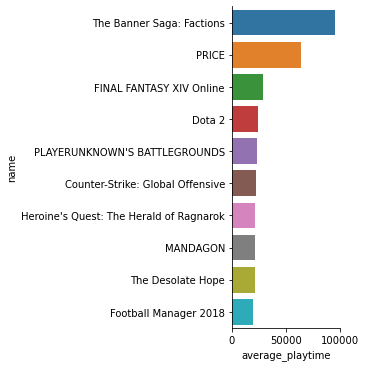

In [52]:
top_games_by_average_playtime1 = sns.catplot(x="average_playtime", y="name",orient='h', kind="bar", data=hehe)

## Number of Platforms per Game

In [53]:
platforms_game = df_steamtest.groupby(['windows', 'mac', 'linux'], as_index=False)['appid'].count()
platforms_game =platforms_game.rename(columns={"appid": "count"}, errors="raise")
platforms_game["platforms"] =  ['Windows', 'Windows and mac', 'Windows, Mac and Linux']
platforms_game.head()

,windows,mac,linux,count,platforms
0,1,0,0,18402,Windows
1,1,1,0,4050,Windows and mac
2,1,1,1,4623,"Windows, Mac and Linux"


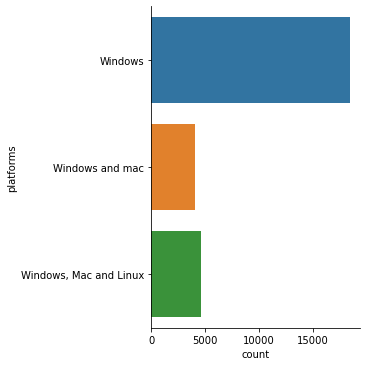

In [54]:
platform_number = sns.catplot(x="count", y="platforms",orient='h', kind="bar", data=platforms_game)

Here we can see that All games are compatible with windows, and all games compatible with linux is compatible with mac. 

## Games with most downloads/sales/owners

In [55]:
Tops_game = df_steam.groupby(['name', 'max_owners'], as_index=False)['appid'].count()
Tops_game =Tops_game.rename(columns={"max_owners": "Sale count"}, errors="raise")
Tops_game = Tops_game.nlargest( 10, 'Sale count')
Tops_game

,name,Sale count,appid
6583,Dota 2,200000000,1
4803,Counter-Strike: Global Offensive,100000000,1
15980,PLAYERUNKNOWN'S BATTLEGROUNDS,100000000,1
21914,Team Fortress 2,50000000,1
24569,Unturned,50000000,1
25332,Warframe,50000000,1
3196,Brawlhalla,20000000,1
4800,Counter-Strike,20000000,1
4802,Counter-Strike: Condition Zero,20000000,1
4804,Counter-Strike: Source,20000000,1


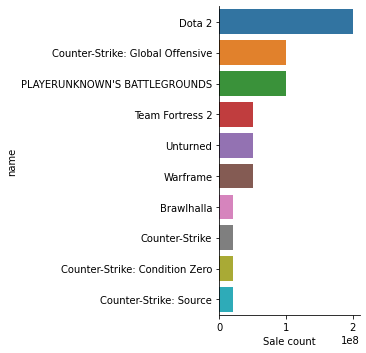

In [56]:
Top_highest_game = sns.catplot(x="Sale count", y="name",orient='h', kind="bar", data=Tops_game)

** DOTA 2 is the game with the most sales followed by CS:GO **

## Top Developers by Sales

In [57]:
Top_developersGames = df_steam.groupby(['developer'], as_index=False)['appid'].count();
Top_developersGames =Top_developersGames.rename(columns={"developer": "Developers", "appid": "Number of games"}, errors="raise")
Top_developersSales = df_steam.groupby(['developer'], as_index=False)['max_owners'].sum();
Top_developersSales =Top_developersSales.rename(columns={"max_owners": "Sale count"}, errors="raise")
Tops_developers = pd.concat([Top_developersGames,Top_developersSales],axis=1)
Tops_developers =  Tops_developers.nlargest( 10, 'Sale count')
Tops_developers



,Developers,Number of games,developer,Sale count
15118,Valve,26,Valve,545000000
10448,PUBG Corporation,1,PUBG Corporation,100000000
15120,Valve;Hidden Path Entertainment,1,Valve;Hidden Path Entertainment,100000000
3805,Digital Extremes,3,Digital Extremes,52100000
1614,Bethesda Game Studios,10,Bethesda Game Studios,50400000
12900,Smartly Dressed Games,1,Smartly Dressed Games,50000000
4759,Facepunch Studios,4,Facepunch Studios,30040000
14873,Ubisoft Montreal,19,Ubisoft Montreal,27240000
1969,Bohemia Interactive,16,Bohemia Interactive,26940000
5659,Gearbox Software,7,Gearbox Software,23600000


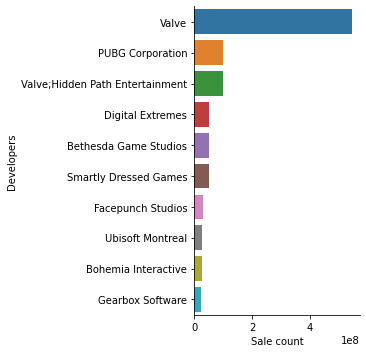

In [58]:
Top_dev=sns.catplot(x="Sale count", y="Developers",orient='h', kind="bar", data=Tops_developers)

** Valve has the most sales, and this is as expected since 6 of their games are in the top 10, and 3 of their games are in the top 5, namely, DOTA 2, CS:GO, and TF2 **

## Top Developers by Game Count

In [59]:
Tops_developers_Games= pd.concat([Top_developersGames,Top_developersSales],axis=1)
Tops_developers_Games =  Tops_developers_Games.nlargest( 10, 'Number of games')
Tops_developers_Games


,Developers,Number of games,developer,Sale count
2625,Choice of Games,94,Choice of Games,2050000
7486,"KOEI TECMO GAMES CO., LTD.",72,"KOEI TECMO GAMES CO., LTD.",6600000
11854,Ripknot Systems,62,Ripknot Systems,1240000
7989,Laush Dmitriy Sergeevich,51,Laush Dmitriy Sergeevich,1050000
9828,"Nikita ""Ghost_RUS""",50,"Nikita ""Ghost_RUS""",1060000
3745,Dexion Games,45,Dexion Games,930000
11803,RewindApp,43,RewindApp,890000
6465,Hosted Games,42,Hosted Games,840000
1864,Blender Games,40,Blender Games,1060000
5107,For Kids,36,For Kids,1060000


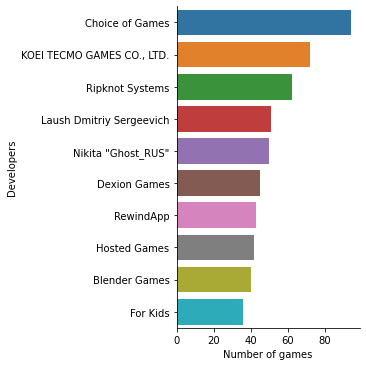

In [60]:
Top_dev_games = sns.catplot(x="Number of games", y="Developers",orient='h', kind="bar", data=Tops_developers_Games)

## Genre Sales and game count


In [61]:
# Splitting genres and getting list
Genres = df_steam.genres.str.cat(sep=';')
Genre_split= Genres.split(';')
Genere_all = [x.strip(' ') for x in Genre_split]
count= Counter(Genere_all)
unique_list= list(count.keys())
print(len(unique_list))
print(unique_list)

# creating copy of dataframe
df_steamtest2= df_steam.copy()
index = df_steamtest2.index
number_of_rows = len(index)
# adding new collumns from splitting each value
df_steamtest2[unique_list] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
stirngtest= "Action"
i=0
count =0
## checking each row and assigning values 1 or 0 if its true or false
for i in range(0,number_of_rows):
    #print("count", count)
    j=0
    stringlist= (df_steamtest2['genres'].iloc[i]).split(";")
    #print(stringlist)
    for j in range(0,len(stringlist)):
       #print(stringlist[j])
        df_steamtest2.at[i,stringlist[j]]=1
        #print(stringlist, df_steamtest2[stringlist[j]].iloc[i])
        #print(stringlist[j])\
    #count+=1;
#df_steamtest2.at[0,stirngtest]= 2
#print(stringlist[j])

df_steamtest2.head(10)

#df_steamtest2[unique_list] = df_steamtest2.genres.str.split(';', expand=True)
#df_steamtest2[unique_list] = df_steamtest2[unique_list].astype('bool')
#df_steamtest2[unique_list] = df_steamtest2[unqieu_list].astype('int')
#df_steamtest2

29
['Action', 'Free to Play', 'Strategy', 'Adventure', 'Indie', 'RPG', 'Animation & Modeling', 'Video Production', 'Casual', 'Simulation', 'Racing', 'Violent', 'Massively Multiplayer', 'Nudity', 'Sports', 'Early Access', 'Gore', 'Utilities', 'Design & Illustration', 'Web Publishing', 'Education', 'Software Training', 'Sexual Content', 'Audio Production', 'Game Development', 'Photo Editing', 'Accounting', 'Documentary', 'Tutorial']


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,Web Publishing,Education,Software Training,Sexual Content,Audio Production,Game Development,Photo Editing,Accounting,Documentary,Tutorial
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,0,0,0,0,0,0,0,0,0,0
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,0,0,0,0,0,0,0,0,0,0
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,...,0,0,0,0,0,0,0,0,0,0
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,0,0,0,0,0,0,0,0,0,0
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,0,0,0,0,0,0,0,0,0,0
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,...,0,0,0,0,0,0,0,0,0,0
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,...,0,0,0,0,0,0,0,0,0,0
7,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,0,0,0,0,0,0,0,0,0,0
8,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,...,0,0,0,0,0,0,0,0,0,0
9,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,...,0,0,0,0,0,0,0,0,0,0


Action                   11903
Free to Play              1704
Strategy                  5247
Adventure                10032
Indie                    19421
RPG                       4311
Animation & Modeling        79
Video Production            38
Casual                   10210
Simulation                5194
Racing                    1024
Violent                    843
Massively Multiplayer      723
Nudity                     266
Sports                    1322
Early Access              2954
Gore                       537
Utilities                  146
Design & Illustration       87
Web Publishing              28
Education                   51
Software Training           31
Sexual Content             245
Audio Production            29
Game Development            17
Photo Editing               12
Accounting                   6
Documentary                  1
Tutorial                     1
dtype: int64

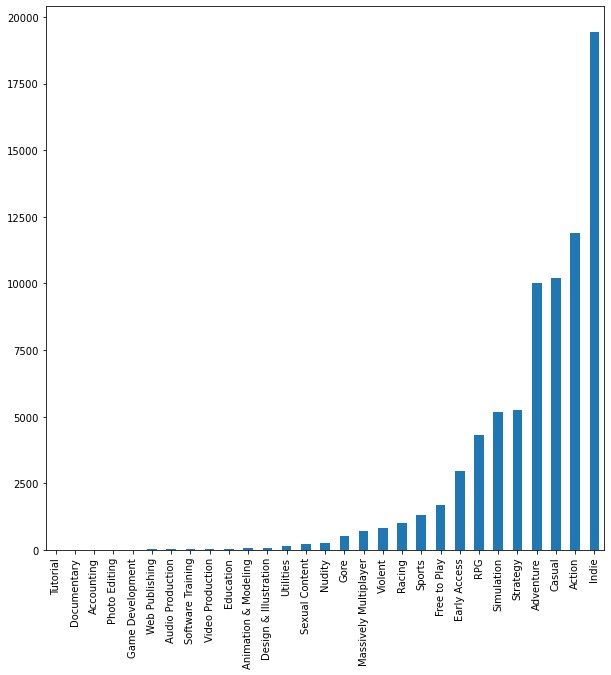

In [62]:
plt.figure(figsize=(10, 10))
genre_games= df_steamtest2[unique_list].sum().sort_values().plot.bar() 
df_steamtest2[unique_list].sum()

** Indie has the most games with 19,421 whereas Tutorial and Documentary are the least with only 1 game **

### Top 10 genre 
** We got the top 10 because as seen above the data is very much skewed after top 10 a big gap between them is present thus we got the top 10 genre by games **

In [63]:
#getting TOtal genre count top 10

i=0
genre_Count= {'Genres': [], 'Game Count': []}
genre_total_Count = pd.DataFrame(genre_Count)
for i in range(0, len(unique_list)):
    new_row = {'Genres':unique_list[i], 'Game Count': (df_steamtest2.loc[df_steamtest2[unique_list[i]] == 1, 'appid'].count())}
#append row to the dataframe
    genre_total_Count = genre_total_Count.append(new_row, ignore_index=True)

genre_total_Count
top_genre_counts= genre_total_Count.nlargest( 10, 'Game Count')
top_genre_counts

,Genres,Game Count
4,Indie,19421.0
0,Action,11903.0
8,Casual,10210.0
3,Adventure,10032.0
2,Strategy,5247.0
9,Simulation,5194.0
5,RPG,4311.0
15,Early Access,2954.0
1,Free to Play,1704.0
14,Sports,1322.0


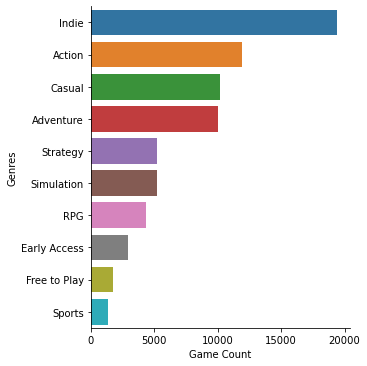

In [64]:
genre_counts = sns.catplot(x="Game Count", y="Genres",orient='h', kind="bar", data=top_genre_counts)

### Top 10 genre by sales
** Similarly we also got the top 10 sales of genres, because of the outliers there is a very signficant change from top 10 to top 11 **

In [65]:
#getting TOtal genre sales

i=0
genre_sales= {'Genres': [], 'Sales': []}
genre_total_sales = pd.DataFrame(genre_sales)
for i in range(0, len(unique_list)):
    new_row = {'Genres':unique_list[i], 'Sales': (df_steamtest2.loc[df_steamtest2[unique_list[i]] == 1, 'max_owners'].sum())}
#append row to the dataframe
    genre_total_sales = genre_total_sales.append(new_row, ignore_index=True)

genre_total_sales
top_genres= genre_total_sales.nlargest( 10, 'Sales')
top_genres

,Genres,Sales
0,Action,3.280610e+09
4,Indie,2.097430e+09
3,Adventure,1.556980e+09
1,Free to Play,1.385920e+09
2,Strategy,1.071090e+09
5,RPG,9.724000e+08
8,Casual,8.052500e+08
9,Simulation,7.463200e+08
12,Massively Multiplayer,6.083700e+08
15,Early Access,2.296900e+08


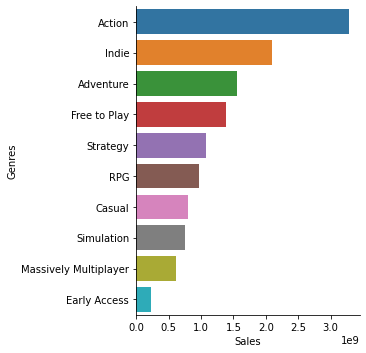

In [66]:
genre_sales = sns.catplot(x="Sales", y="Genres",orient='h', kind="bar", data=top_genres)

** Action has the most sales despite Indie having the most games. We believe that this is due to the fact that the games with the top sales are all in the Action genre **

In [67]:
### Categories sale and game count

### Categories sale and game count
** We then explored the categories and its top **

In [68]:
# Splitting categoreis and getting list
Categories = df_steam.categories.str.cat(sep=';')
Categories_split= Categories.split(';')
Category_all = [x.strip(' ') for x in Categories_split]
count= Counter(Category_all)
category_list= list(count.keys())
print(len(category_list))
print(category_list)

# creating copy of dataframe
df_categories= df_steam.copy()
index = df_categories.index
number_of_rows = len(index)
# adding new collumns from splitting each value
df_categories[category_list] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
i=0
count =0
## checking each row and assigning values 1 or 0 if its true or false
for i in range(0,number_of_rows):
    #print("count", count)
    j=0
    stringlist= (df_categories['categories'].iloc[i]).split(";")
    #print(stringlist)
    for j in range(0,len(stringlist)):
        #print(stringlist[j])
        df_categories.at[i,stringlist[j]]=1

#df_categories.head(10)
df_categories.tail()

#df_steamtest2[unique_list] = df_steamtest2.genres.str.split(';', expand=True)
#df_steamtest2[unique_list] = df_steamtest2[unique_list].astype('bool')
#df_steamtest2[unique_list] = df_steamtest2[unqieu_list].astype('int')
#df_steamtest2

29
['Multi-player', 'Online Multi-Player', 'Local Multi-Player', 'Valve Anti-Cheat enabled', 'Single-player', 'Steam Cloud', 'Steam Achievements', 'Steam Trading Cards', 'Captions available', 'Partial Controller Support', 'Includes Source SDK', 'Cross-Platform Multiplayer', 'Stats', 'Commentary available', 'Includes level editor', 'Steam Workshop', 'In-App Purchases', 'Co-op', 'Full controller support', 'Steam Leaderboards', 'SteamVR Collectibles', 'Online Co-op', 'Shared/Split Screen', 'Local Co-op', 'MMO', 'VR Support', 'Mods', 'Mods (require HL2)', 'Steam Turn Notifications']


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,Steam Leaderboards,SteamVR Collectibles,Online Co-op,Shared/Split Screen,Local Co-op,MMO,VR Support,Mods,Mods (require HL2),Steam Turn Notifications
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,...,0,0,0,0,0,0,0,0,0,0
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,...,0,0,0,0,0,0,0,0,0,0
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,...,0,0,0,1,0,0,0,0,0,0
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,...,0,0,0,0,0,0,0,0,0,0
27074,1069460,Rune Lord,2019-04-24,1,Adept Studios GD,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,...,0,0,0,0,0,0,0,0,0,0


Multi-player                   3974
Online Multi-Player            2487
Local Multi-Player             1615
Valve Anti-Cheat enabled         94
Single-player                 25678
Steam Cloud                    7219
Steam Achievements            14130
Steam Trading Cards            7918
Captions available              721
Partial Controller Support     4234
Includes Source SDK              35
Cross-Platform Multiplayer     1081
Stats                          1878
Commentary available            144
Includes level editor          1036
Steam Workshop                  897
In-App Purchases                690
Co-op                          1721
Full controller support        5695
Steam Leaderboards             3439
SteamVR Collectibles             40
Online Co-op                   1071
Shared/Split Screen            2152
Local Co-op                    1059
MMO                             421
VR Support                      231
Mods                              2
Mods (require HL2)          

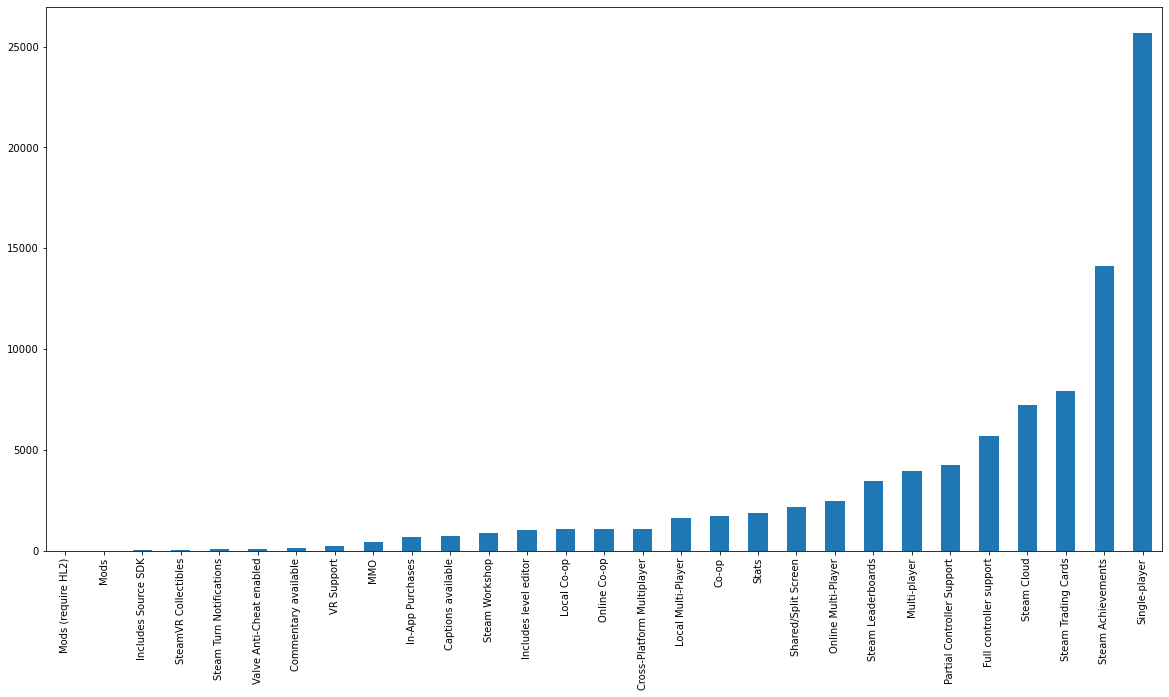

In [69]:
plt.figure(figsize=(20, 10))
categories_games= df_categories[category_list].sum().sort_values().plot.bar() 
df_categories[category_list].sum()

### Top 10 Categories by game count
#### Similar to genres, we also got the top 10 of categories since the data is very biased towards Single Player 

In [70]:
#getting TOtal category count

i=0
cat_Count= {'Category': [], 'Game Count': []}
cat_total_Count = pd.DataFrame(cat_Count)
for i in range(0, len(category_list)):
    new_row = {'Category':category_list[i], 'Game Count': (df_categories.loc[df_categories[category_list[i]] == 1, 'appid'].sum())}
    #append row to the dataframe
    cat_total_Count = cat_total_Count.append(new_row, ignore_index=True)

cat_total_Count
Top_cat_counts= cat_total_Count.nlargest(10, 'Game Count')
Top_cat_counts


,Category,Game Count
4,Single-player,1.529815e+10
6,Steam Achievements,8.211400e+09
5,Steam Cloud,3.839918e+09
7,Steam Trading Cards,3.531791e+09
18,Full controller support,3.098514e+09
9,Partial Controller Support,2.370632e+09
0,Multi-player,1.928749e+09
19,Steam Leaderboards,1.805461e+09
1,Online Multi-Player,1.552866e+09
22,Shared/Split Screen,1.180122e+09


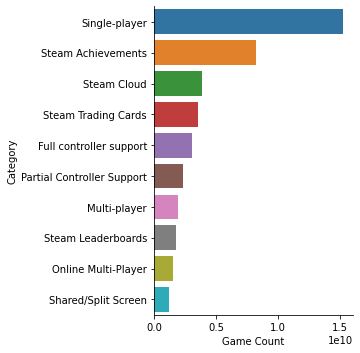

In [71]:
cat_counts = sns.catplot(x="Game Count", y="Category",orient='h', kind="bar", data=Top_cat_counts)

** Single-Player has the most games, and this high number could be due to the abundance of Indie games that also happen to be single-player **

### Top 10 categories per sales
#### Similar to the previous we only got the highest selling categories

In [72]:
#getting TOtal category sales

i=0
cat_sales= {'Categories': [], 'Sales': []}
cat_total_sales = pd.DataFrame(cat_sales)
for i in range(0, len(category_list)):
    new_row = {'Categories':category_list[i], 'Sales': (df_categories.loc[df_categories[category_list[i]] == 1, 'max_owners'].sum())}
#append row to the dataframe
    cat_total_sales = cat_total_sales.append(new_row, ignore_index=True)

cat_total_sales
top_cat= cat_total_sales.nlargest( 10, 'Sales')
top_cat

,Categories,Sales
4,Single-player,3.872340e+09
6,Steam Achievements,3.024640e+09
7,Steam Trading Cards,2.883680e+09
0,Multi-player,2.427540e+09
5,Steam Cloud,1.884780e+09
18,Full controller support,1.376260e+09
17,Co-op,1.253530e+09
9,Partial Controller Support,1.032290e+09
16,In-App Purchases,9.965200e+08
15,Steam Workshop,9.928300e+08


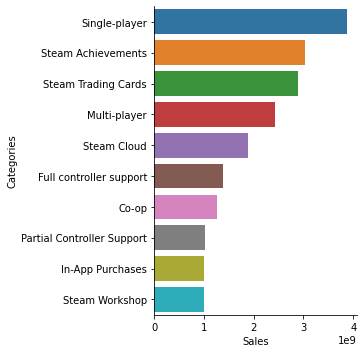

In [73]:
genre_sales = sns.catplot(x="Sales", y="Categories",orient='h', kind="bar", data=top_cat)

** This was a bit of a shocker since we weren't expecting Single-player games to have the most sales. We weren't expecting it because the top 3 games are not single-player, and based on the genre sales, we saw that the top 3 being in the action genre influenced the numbers greatly to make action the top genre in sales despite Indie being the genre with the most games. We were expecting something similar here. Perhaps, there are also a lot of action games that happen to be single-player like Fallout, FarCry, etc. Or maybe the dataset is flawed in the categories attribute with regards to the top games by sales.**

## Trends

### Genre trends
#### We only got the years 2010-2019 as they were the years with the most games created and we will only be checking the trends of the top 10

In [74]:
## LISTS
#top gerne by sales
top_10_genre=  top_genres["Genres"].tolist()
#top gerne by game count
top_10_genre_c = top_genre_counts["Genres"].tolist()
top_10_genre_c

['Indie',
 'Action',
 'Casual',
 'Adventure',
 'Strategy',
 'Simulation',
 'RPG',
 'Early Access',
 'Free to Play',
 'Sports']

In [75]:
genre_trends = df_steamtest2.groupby(['release_year'], as_index=False)[unique_list].sum()

genre_trends = genre_trends.rename(columns={"release_year": "Year Released"}, errors="raise")
genre_trends= genre_trends.nlargest(11, 'Year Released')
        #too string for easier plotting 
genre_trends['Year Released']= genre_trends['Year Released'].astype(str)

genre_trends

,Year Released,Action,Free to Play,Strategy,Adventure,Indie,RPG,Animation & Modeling,Video Production,Casual,...,Web Publishing,Education,Software Training,Sexual Content,Audio Production,Game Development,Photo Editing,Accounting,Documentary,Tutorial
22,2019,922,208,436,870,1701,426,5,1,901,...,1,0,0,0,0,1,0,0,0,0
21,2018,3513,570,1461,3001,6404,1276,25,12,3624,...,6,14,8,93,10,7,2,4,1,1
20,2017,2905,381,1174,2478,4706,935,15,7,2560,...,8,12,4,105,8,4,2,0,0,0
19,2016,1950,284,806,1636,3154,621,13,9,1624,...,2,9,5,34,7,1,2,2,0,0
18,2015,1156,145,578,1011,1900,502,11,6,754,...,5,9,8,9,2,4,4,0,0,0
17,2014,647,62,331,582,887,283,5,2,404,...,2,4,4,3,2,0,2,0,0,0
16,2013,199,21,104,153,240,74,3,0,80,...,3,3,2,1,0,0,0,0,0,0
15,2012,162,17,75,97,167,58,2,1,53,...,1,0,0,0,0,0,0,0,0,0
14,2011,102,10,75,54,97,37,0,0,42,...,0,0,0,0,0,0,0,0,0,0
13,2010,81,2,60,48,64,33,0,0,69,...,0,0,0,0,0,0,0,0,0,0


### Top Selling Genres and the Number of Games Released Yearly

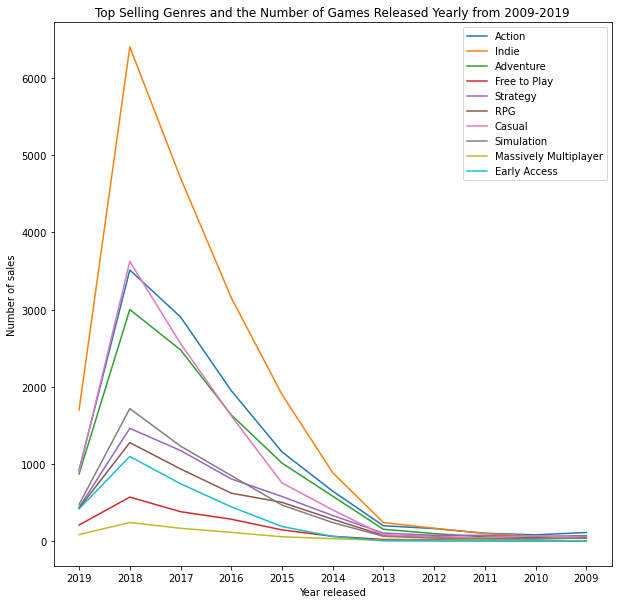

In [76]:
i =0 
plt.figure(figsize=(10, 10))
for i in range(0, len(top_10_genre)):

   
    #fig = plt.figure()
    #ax = fig.add_axes([0,0,1,1])
    #ax.set_xticks(np.arange(len(unique_list)))
    #ax.set_xticklabels(unique_list)
    plt.plot(genre_trends['Year Released'], genre_trends[top_10_genre[i]], label= top_10_genre[i])
    #plt.title(genre_trends[unique_list[i])
    #plt.title(genre + "  genre games over the years")
plt.xlabel('Year released')
plt.ylabel('Number of sales')
plt.title('Top Selling Genres and the Number of Games Released Yearly from 2009-2019')
plt.legend()
plt.show()

As seen above the highest selling genres are actually increasing per year, having indie at the highest. We can see a big spike from2013 o 2018 for indie games. This is maybe because many people chose the path of game development and thus created many indie games. 

### Category Trends
#### Similar with genres we will only get 2009-2019 and the top 10 of catgories

In [77]:
cat_trends = df_categories.groupby(['release_year'], as_index=False)[category_list].sum()
cat_trends = cat_trends.rename(columns={"release_year": "Year Released"}, errors="raise")
cat_trends= cat_trends.nlargest(11, 'Year Released')
        #too string for easier plotting 
cat_trends['Year Released']= cat_trends['Year Released'].astype(str)
cat_trends

,Year Released,Multi-player,Online Multi-Player,Local Multi-Player,Valve Anti-Cheat enabled,Single-player,Steam Cloud,Steam Achievements,Steam Trading Cards,Captions available,...,Steam Leaderboards,SteamVR Collectibles,Online Co-op,Shared/Split Screen,Local Co-op,MMO,VR Support,Mods,Mods (require HL2),Steam Turn Notifications
22,2019,276,287,156,0,2063,465,1002,126,24,...,167,0,114,151,106,41,3,0,0,3
21,2018,927,928,565,4,7709,1780,4124,774,149,...,835,6,373,527,362,103,13,0,0,11
20,2017,761,741,531,6,6025,1640,3388,1946,183,...,757,18,315,558,336,87,38,0,0,13
19,2016,619,373,264,8,4148,1252,2470,2304,141,...,671,15,173,375,172,85,106,0,0,17
18,2015,473,71,61,12,2476,922,1557,1484,117,...,436,0,46,268,52,45,44,0,0,13
17,2014,295,35,14,7,1496,589,845,792,61,...,273,0,25,142,14,31,18,0,0,3
16,2013,132,16,6,9,400,212,271,255,23,...,114,1,10,49,7,9,8,0,0,1
15,2012,96,10,5,12,298,120,181,110,4,...,66,0,7,33,3,11,1,0,0,1
14,2011,91,10,4,9,229,74,122,46,2,...,62,0,5,23,4,8,0,0,0,1
13,2010,78,4,0,5,231,58,89,25,3,...,44,0,1,12,0,1,0,1,0,0


In [78]:
#top category by sales
top_10_cat=  top_cat["Categories"].tolist()
#top category by number of games
top_10_cat_c = Top_cat_counts["Category"].tolist()
#top_10_cat_c

### Top Selling Categories and the Number of Games Released Yearly

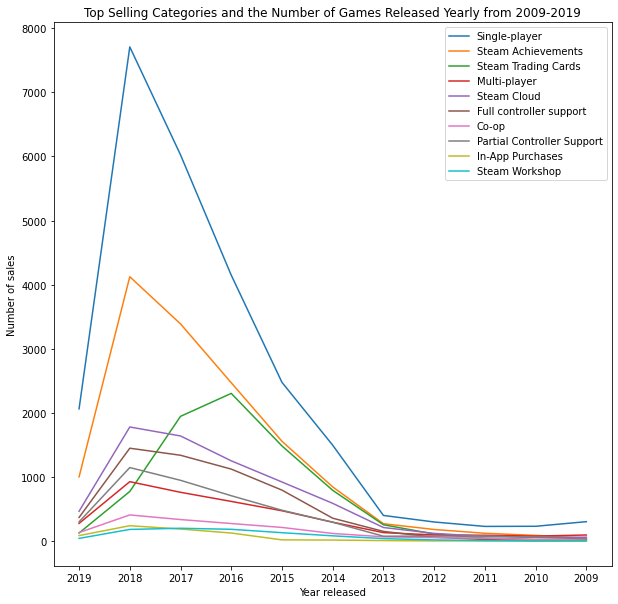

In [79]:
i =0 
plt.figure(figsize=(10, 10))
for i in range(0, len(top_10_cat)):


    #fig = plt.figure()
    #ax = fig.add_axes([0,0,1,1])
    #ax.set_xticks(np.arange(len(unique_list)))
    #ax.set_xticklabels(unique_list)
    plt.plot(cat_trends['Year Released'], cat_trends[top_10_cat[i]], label= top_10_cat[i])
    #plt.title(genre_trends[unique_list[i])
    #plt.title(genre + "  genre games over the years")
plt.xlabel('Year released')
plt.ylabel('Number of sales')
plt.title('Top Selling Categories and the Number of Games Released Yearly from 2009-2019')
plt.legend()
plt.show()

Similar to genres we can also see a trend in categories having multiplayer and single player at the highest. We can also see a decline in 1 category which is the steam trading cards. We can see that after 2016 most games did not have this category anymore.

### Genres of Top 100 Most Selling Games

In [80]:
Tops_game_genre = df_steamtest2.groupby(['appid', 'name', 'max_owners'], as_index=False)[unique_list].sum()
Tops_game_genre =Tops_game_genre.rename(columns={"max_owners": "Sale count"}, errors="raise")
Tops_game_genre = Tops_game_genre.nlargest( 100, 'Sale count')
Tops_game_genre

,appid,name,Sale count,Action,Free to Play,Strategy,Adventure,Indie,RPG,Animation & Modeling,...,Web Publishing,Education,Software Training,Sexual Content,Audio Production,Game Development,Photo Editing,Accounting,Documentary,Tutorial
22,570,Dota 2,200000000,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,730,Counter-Strike: Global Offensive,100000000,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12836,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,100000000,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,440,Team Fortress 2,50000000,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1634,230410,Warframe,50000000,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,17410,Mirror's Edge™,5000000,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
409,17470,Dead Space,5000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
444,20540,Company of Heroes: Tales of Valor,5000000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
450,20900,The Witcher: Enhanced Edition Director's Cut,5000000,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
#getting genres of top 50

i=0
genre_top100= {'Genres': [], 'Game count': []}
genre_top100_games = pd.DataFrame(genre_top100)
for i in range(0, len(unique_list)):
    new_row = {'Genres':unique_list[i], 'Game count': (Tops_game_genre.loc[Tops_game_genre[unique_list[i]] == 1, 'appid'].count())}
#append row to the dataframe
    genre_top100_games= genre_top100_games.append(new_row, ignore_index=True)

genre_top100_games = genre_top100_games.nlargest(10, 'Game count')
genre_top100_games

,Genres,Game count
0,Action,78.0
1,Free to Play,26.0
3,Adventure,21.0
4,Indie,17.0
5,RPG,16.0
12,Massively Multiplayer,15.0
2,Strategy,12.0
9,Simulation,9.0
8,Casual,5.0
10,Racing,2.0


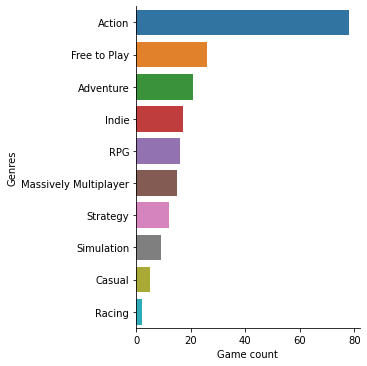

In [82]:
Top_100_games_genre= sns.catplot(y="Genres", x="Game count",orient='h', kind="bar", data= genre_top100_games)

Here we can see that even though indie was seen as one of the top selling genres, it is not in the top 100 games genres. THis is because indie only got its sales because of the quanitty of indie games

### Categories of Top 100 Most Selling Games

In [83]:
Tops_game_cat = df_categories.groupby(['appid', 'name', 'max_owners'], as_index=False)[category_list].sum()
Tops_game_cat =Tops_game_cat.rename(columns={"max_owners": "Sale count"}, errors="raise")
Tops_game_cat = Tops_game_cat.nlargest( 100, 'Sale count')
Tops_game_cat

,appid,name,Sale count,Multi-player,Online Multi-Player,Local Multi-Player,Valve Anti-Cheat enabled,Single-player,Steam Cloud,Steam Achievements,...,Steam Leaderboards,SteamVR Collectibles,Online Co-op,Shared/Split Screen,Local Co-op,MMO,VR Support,Mods,Mods (require HL2),Steam Turn Notifications
22,570,Dota 2,200000000,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
25,730,Counter-Strike: Global Offensive,100000000,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12836,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,100000000,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,440,Team Fortress 2,50000000,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1634,230410,Warframe,50000000,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,17410,Mirror's Edge™,5000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
409,17470,Dead Space,5000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
444,20540,Company of Heroes: Tales of Valor,5000000,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
450,20900,The Witcher: Enhanced Edition Director's Cut,5000000,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
#getting categories of top 50

i=0
cat_top100= {'Categories': [], 'Game count': []}
cat_top100_games = pd.DataFrame(cat_top100)
for i in range(0, len(category_list)):
    new_row = {'Categories':category_list[i], 'Game count': (Tops_game_cat.loc[Tops_game_cat[category_list[i]] == 1, 'appid'].count())}
#append row to the dataframe
    cat_top100_games= cat_top100_games.append(new_row, ignore_index=True)

cat_top100_games = cat_top100_games.nlargest(10, 'Game count')
cat_top100_games

,Categories,Game count
4,Single-player,68.0
0,Multi-player,65.0
6,Steam Achievements,59.0
7,Steam Trading Cards,53.0
5,Steam Cloud,41.0
17,Co-op,30.0
3,Valve Anti-Cheat enabled,25.0
18,Full controller support,24.0
1,Online Multi-Player,22.0
16,In-App Purchases,22.0


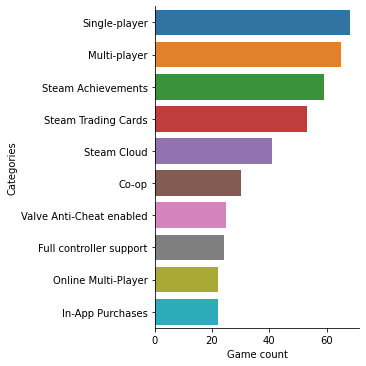

In [85]:
Top_100_games_cat= sns.catplot(y="Categories", x="Game count",orient='h', kind="bar", data= cat_top100_games)

Here we can also see the top categories for 100 games, hwoever because all of them are equal to 100, this means categories may not pose a large difference in terms of sales. A game can have many categories and can be both single player and multiplayer

# Sales and Ownership
#### Top 30 Prices with the Most Sales, Sales/Ownership drops significantly after 15 dollars

In [86]:
price_factor_sales=  df_steam.groupby(['price'], as_index=False)['max_owners'].sum()
price_factor_sales =price_factor_sales.rename(columns={"max_owners": "Sale count"}, errors="raise")
price_factor_sales = price_factor_sales.nlargest(20, 'Sale count')
print(price_factor_sales.loc[0])
price_factor_sales = price_factor_sales.iloc[1: , :]
price_factor_sales.sort_values(by=['price'], inplace=True)
price_factor_sales


price         0.000000e+00
Sale count    1.557510e+09
Name: 0, dtype: float64


,price,Sale count
9,0.79,185620000
25,1.59,45070000
35,1.99,58470000
80,3.99,299070000
96,4.99,72020000
127,6.99,310070000
132,7.19,269410000
142,7.99,70270000
157,9.99,164090000
164,10.99,170130000


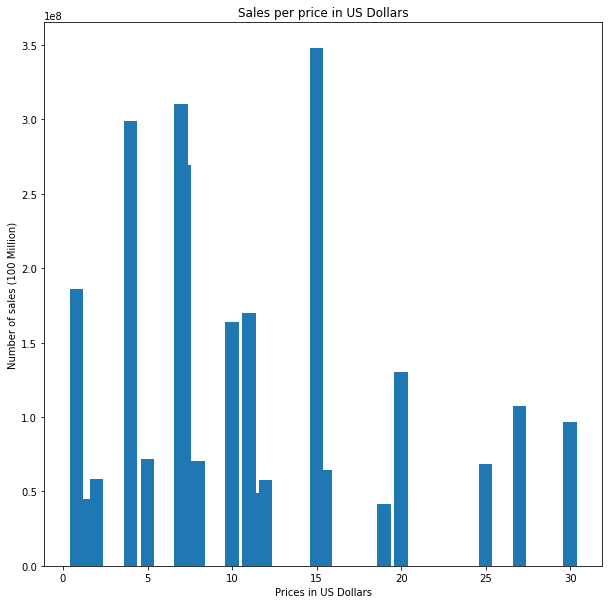

In [87]:
plt.figure(figsize=(10, 10))
plt.bar(price_factor_sales['price'], price_factor_sales['Sale count'])
plt.ylabel('Number of sales (100 Million)')
plt.xlabel('Prices in US Dollars')
plt.title('Sales per price in US Dollars')
plt.show()

Here we can see the avg prices of the top prices of steam. Here we can see that the best selling prices are about \\$6 - \\$15 anything beyond \\$15 the sales plummet, it was not seen here, but past \\$30 more price ranges have less sales. This could be because people would want to buy cheaper games, while games that are expensive still have a large enough players for their income. Thus although the optimal price would be \\$6-\\$15, higher prices can still yield better, as you are exhanging quantity of buyers to quantity of dollars (10 people buying \\$30 = \\$300 vs 50 people buying \\$6 = \\$300)